In [1]:
import pandas as pd
total_data=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
total_data.to_csv(r"/workspaces/random-forest/data/raw/raw_data.csv", index=False)

In [2]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
total_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
print(total_data['BloodPressure'].value_counts()[0])
print(total_data['Glucose'].value_counts()[0])
print(total_data['SkinThickness'].value_counts()[0])
print(total_data['Insulin'].value_counts()[0])
print(total_data['BMI'].value_counts()[0])

35
5
227
374
11


In [5]:
total_data[(total_data['BloodPressure']==0) & (total_data['SkinThickness']==0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1
266,0,138,0,0,0,36.3,0.933,25,1


In [6]:
total_data[(total_data['Insulin']==0) & (total_data['SkinThickness']==0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
762,9,89,62,0,0,22.5,0.142,33,0


In [5]:
total_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


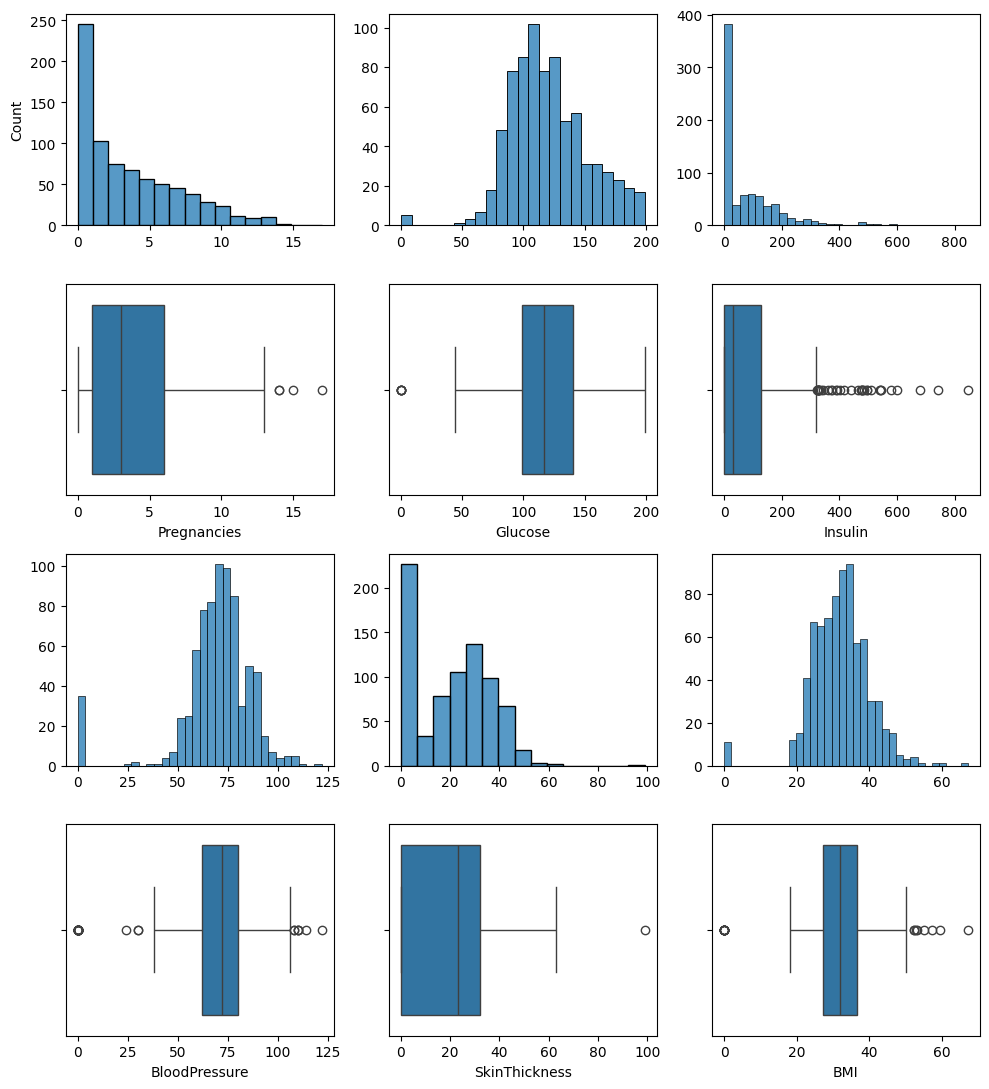

In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(4, 3, figsize = (10, 11))

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = total_data, x = "Pregnancies").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data, x = "Pregnancies")
sns.histplot(ax = axis[0, 1], data = total_data, x = "Glucose").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "Glucose")
sns.histplot(ax = axis[2, 0], data = total_data, x = "BloodPressure").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 0], data = total_data, x = "BloodPressure")
sns.histplot(ax = axis[2, 1], data = total_data, x = "SkinThickness").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = total_data, x = "SkinThickness")

sns.histplot(ax = axis[0, 2], data = total_data, x = "Insulin").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = total_data, x = "Insulin")
sns.histplot(ax = axis[2, 2], data = total_data, x = "BMI").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 2], data = total_data, x = "BMI")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

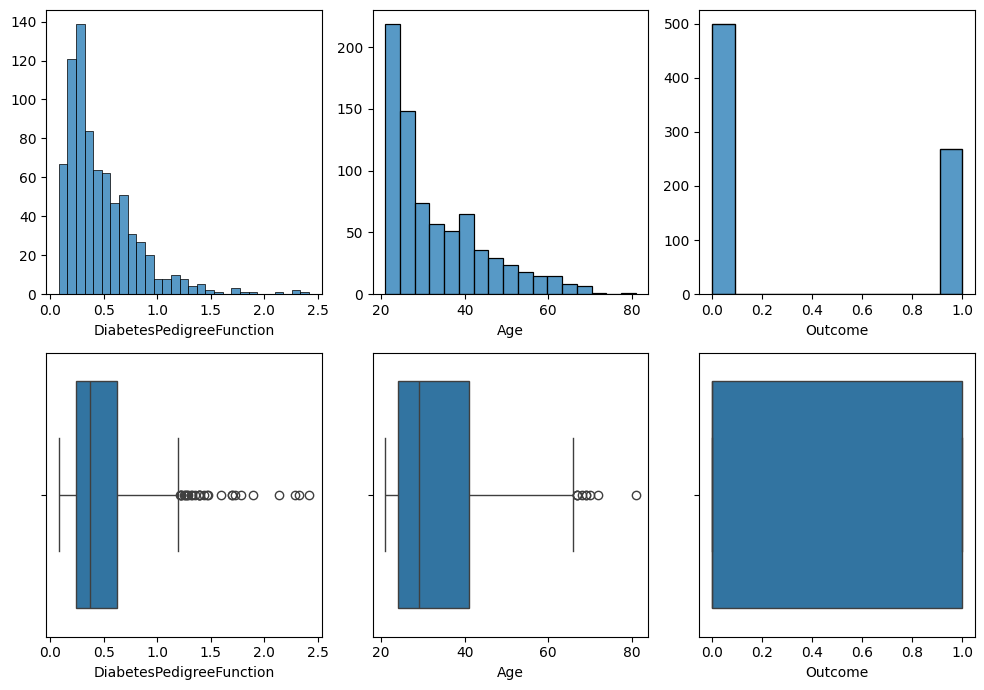

In [8]:
fig, axis = plt.subplots(2, 3, figsize = (10, 7))

# Crear un histograma múltiple
sns.histplot(ax = axis[0,0], data = total_data, x = "DiabetesPedigreeFunction").set(ylabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data, x = "DiabetesPedigreeFunction")
sns.histplot(ax = axis[0, 1], data = total_data, x = "Age").set(ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "Age")
sns.histplot(ax = axis[0, 2], data = total_data, x = "Outcome").set(ylabel = None)
sns.boxplot(ax = axis[1, 2], data = total_data, x = "Outcome")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

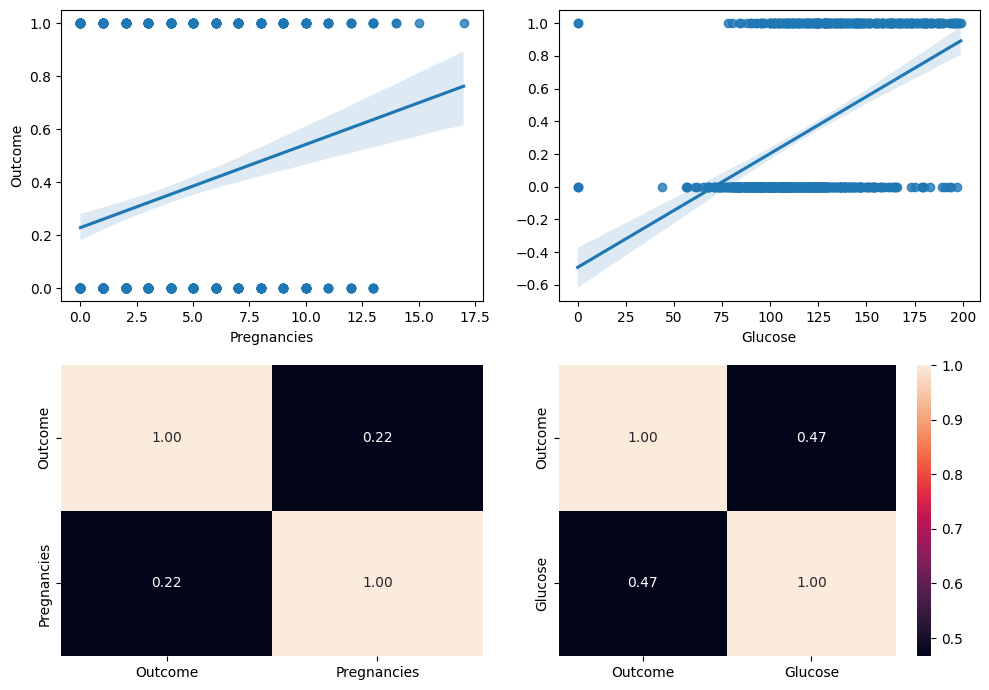

In [9]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = total_data, x = "Pregnancies", y = "Outcome")
sns.heatmap(total_data[["Outcome", "Pregnancies"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "Glucose", y = "Outcome").set(ylabel=None)
sns.heatmap(total_data[["Outcome", "Glucose"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

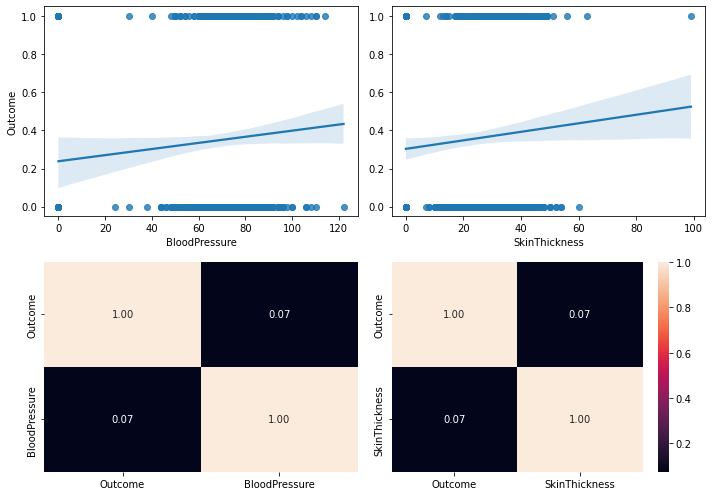

In [13]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = total_data, x = "BloodPressure", y = "Outcome")
sns.heatmap(total_data[["Outcome", "BloodPressure"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "SkinThickness", y = "Outcome").set(ylabel=None)
sns.heatmap(total_data[["Outcome", "SkinThickness"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

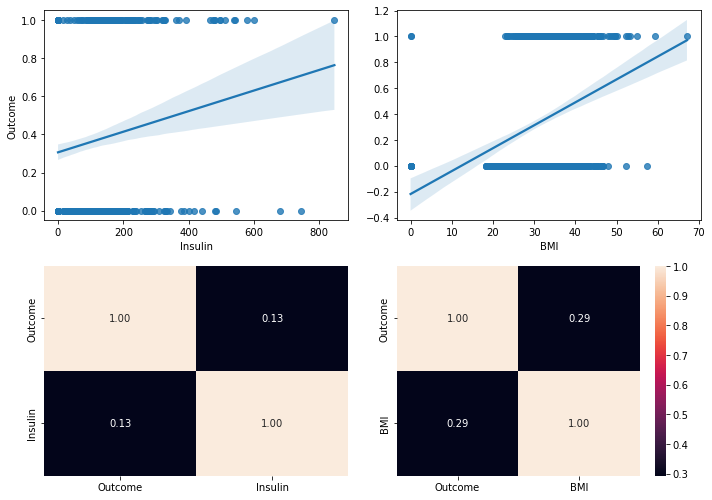

In [14]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = total_data, x = "Insulin", y = "Outcome")
sns.heatmap(total_data[["Outcome", "Insulin"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "BMI", y = "Outcome").set(ylabel=None)
sns.heatmap(total_data[["Outcome", "BMI"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

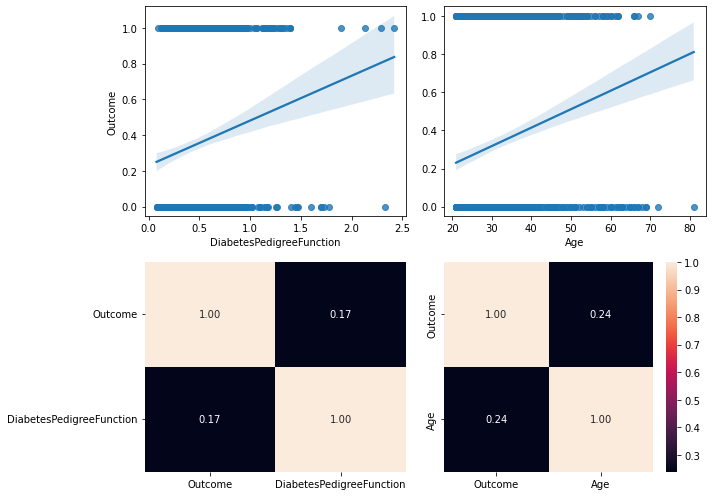

In [15]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = total_data, x = "DiabetesPedigreeFunction", y = "Outcome")
sns.heatmap(total_data[["Outcome", "DiabetesPedigreeFunction"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "Age", y = "Outcome").set(ylabel=None)
sns.heatmap(total_data[["Outcome", "Age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [16]:
cols=[str(i) for i in total_data.columns]
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

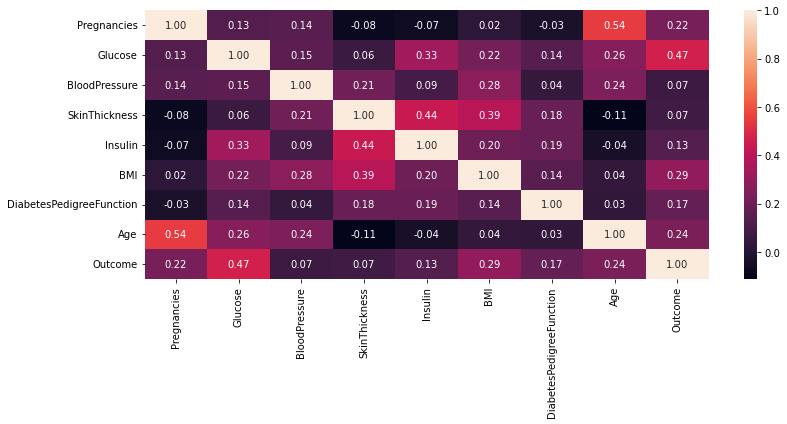

In [17]:
fig, axis = plt.subplots(figsize = (12, 6))

sns.heatmap(total_data[cols].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

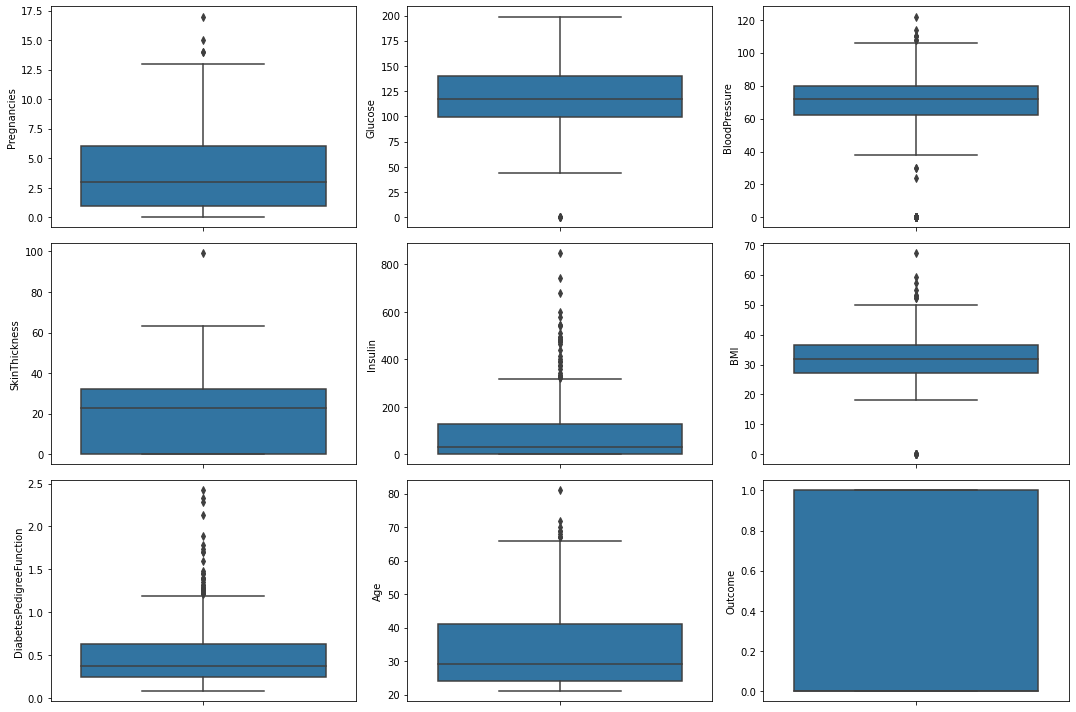

In [18]:
fig, axis = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = total_data, y = "Pregnancies")
sns.boxplot(ax = axis[0, 1], data = total_data, y = "Glucose")
sns.boxplot(ax = axis[0, 2], data = total_data, y = "BloodPressure")
sns.boxplot(ax = axis[1, 0], data = total_data, y = "SkinThickness")
sns.boxplot(ax = axis[1, 1], data = total_data, y = "Insulin")
sns.boxplot(ax = axis[1, 2], data = total_data, y = "BMI")
sns.boxplot(ax = axis[2, 0], data = total_data, y = "DiabetesPedigreeFunction")
sns.boxplot(ax = axis[2, 1], data = total_data, y = "Age")
sns.boxplot(ax = axis[2, 2], data = total_data, y = "Outcome")

plt.tight_layout()

plt.show()

In [10]:
stats=total_data.describe()
stats

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
total_data['Glucose'] = total_data['Glucose'].apply(lambda x: total_data['Glucose'].median() if x < 5 else x)
total_data['BloodPressure'] = total_data['BloodPressure'].apply(lambda x: total_data['BloodPressure'].median() if x < 5 else x)
total_data['SkinThickness'] = total_data['SkinThickness'].replace(0, total_data['SkinThickness'].median())
total_data['Insulin'] = total_data['Insulin'].apply(lambda x: total_data['Insulin'].median() if x < 5 else x)
total_data['BMI'] = total_data['BMI'].apply(lambda x: total_data['BMI'].median() if x < 10 else x)

In [12]:
from sklearn.model_selection import train_test_split

num_variables = [str(i)  for i in total_data.columns]

# We divide the dataset into training and test samples
X = total_data.drop("Outcome", axis = 1)#[num_variables]
y = total_data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 14, stratify = y)

X_train.to_csv(r"/workspaces/random-forest/data/interim/X_train.csv", index=False)
# with open("X_train.csv", "w") as f:
#     f.write(y_train)
X_test.to_csv(r"/workspaces/random-forest/data/interim/X_test.csv", index=False)
# with open("X_test.csv", "w") as f:
#     f.write(y_test)

In [13]:
y_test.to_csv(r"/workspaces/random-forest/data/interim/y_test.csv", index=False)
y_train.to_csv(r"/workspaces/random-forest/data/interim/y_train.csv", index=False)